# Keras Training : Multi-Layer-Perception(MLP) on MNIST dataset _ using Sequential Model

## *Features*

### *# Plot example images from mnist using pyplot*
### *# Using Sequential method to build model*
### *# Call Tensorboard at 127.0.0.1:6006*
### *# Plot hbar for the predicted probability for top 5 classes*
### *# Plot and save graphs of a model using plot_model in keras.utils*
### *# Call model.summary() to show info of model*



## Import Libraries

In [1]:
import keras
from keras.utils import to_categorical

# Can plot model and save it.
from keras.utils import plot_model
from keras.datasets import mnist
from keras.callbacks import TensorBoard

# keras.model have two main types of models: Sequential and the Model class using functional API
# we will focus on the sequential model in this notebook
from keras.models import Sequential

# Dense: fully connected layer
# Activation: activation function such as relu,sigmoid,softmax...(look up Keras docs for more)
from keras.layers import Dense, Activation, Dropout

# Many optimizers can be chosen: Adagrad, RMSprop, SGD...(look up Keras docs for more)
from keras.optimizers import Adagrad, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


## Useful parameters

In [2]:
# 10 classes
num_class = 10

# Image size: 28*28 
image_size_flat = 784

# Training batch size, default is 32
batch = 64

# Training epochs
epoch = 10

## Load MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
################################################
# Very important!!! Preprocess the image data! #
################################################
x_train_flat = x_train.reshape(-1,image_size_flat)
x_train_flat = x_train_flat.astype('float32')
x_train_flat/=255

x_test_flat = x_test.reshape(-1,image_size_flat)
x_test_flat = x_test_flat.astype('float32')
x_test_flat/=255

y_train_onehot = to_categorical(y_train,num_classes=num_class)
y_test_onehot = to_categorical(y_test,num_classes=num_class)

## Define useful methods

In [4]:
def draw_image(images, y_label, y_pred = None):
    
    assert(len(images) == len(y_label) == 9)
    
    fig, axes = plt.subplots(3,3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28), cmap = 'binary')
        
        if y_pred is None:
            ax.set_xlabel("True: "+str(y_label[i]))
        else:
            ax.set_xlabel("True: "+str(y_label[i])+"  Pred: "+str(y_pred[i]))
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()
        

In [5]:
def draw_prob(images, y_label, y_prob):
    
    assert(len(images) == len(y_label) == 9)
    labels = [0,1,2,3,4,5,6,7,8,9]
    
    fig, axes = plt.subplots(9,2,figsize=(10, 20))
    fig.subplots_adjust(hspace=1.0, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if i%2 == 0:
            ax.imshow(images[int(i/2)].reshape(28,28), cmap = 'binary')
            ax.set_xlabel("True: "+str(y_label[int(i/2)]))
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            index = int((i-1)/2)
            y_pos = np.arange(5)  # Show five top probabilities
            ans = y_label[index]  # The answer of the current image
            probs = y_prob[index]  # List of probabilities
            prob_result = zip(labels,probs) # (label,prob) list
            prob_result_sorted = sorted(prob_result, key = lambda tup: tup[1], reverse=True)
            prob_result_sorted = list(zip(*prob_result_sorted))
            
            bars = ax.barh(y_pos,(prob_result_sorted[1][:5]),color='green')
            ax.set_yticks(y_pos)
            ax.set_yticklabels(prob_result_sorted[0][:5])
            ax.set_xlabel("Probability")
            

## Draw some example images

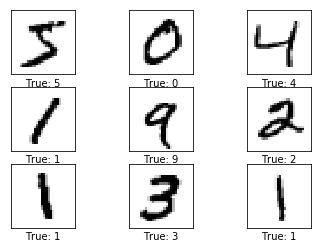

In [38]:
draw_image(x_train_flat[:9], y_train[:9])

## Construct MLP model

### Build model

In [42]:
model = Sequential(
[Dense(128,input_dim=image_size_flat),
 Activation('relu'),
 Dropout(0.2),
 Dense(256),
 Activation('relu'),
 Dropout(0.2),
 Dense(num_class),
 Activation('softmax')
])

### Show Model Info

In [43]:
# Show model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
__________

In [44]:
# plot model graph
plot_model(model, to_file='mnist_mlp_v1_graph.png')

### Compile model

In [45]:
model.compile(
optimizer = Adagrad(lr=0.01,epsilon=None,decay=0.0),
loss = 'categorical_crossentropy',
metrics = ['acc']
)

## Train model

In [46]:
model.fit(
    x = x_train_flat,
    y = y_train_onehot,
    batch_size = batch,
    epochs = epoch,
    validation_split=0.3,
    verbose = 1,
    shuffle=True,
    callbacks=[TensorBoard()]
)

Instructions for updating:
Use the retry module or similar alternatives.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 68us/step - loss: 0.3104 - acc: 0.9058 - val_loss: 0.1683 - val_acc: 0.9482
Epoch 2/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.1721 - acc: 0.9480 - val_loss: 0.1378 - val_acc: 0.9588
Epoch 3/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.1425 - acc: 0.9580 - val_loss: 0.1223 - val_acc: 0.9636
Epoch 4/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.1232 - acc: 0.9624 - val_loss: 0.1151 - val_acc: 0.9659
Epoch 5/10
42000/42000 [==============================] - 3s 71us/step - loss: 0.1080 - acc: 0.9671 - val_loss: 0.1116 - val_acc: 0.9667
Epoch 6/10
42000/42000 [==============================] - 3s 67us/step - loss: 0.1007 - acc: 0.9702 - val_loss: 0.1058 - val_acc: 0.9686
Epoch 7/10
42000/42000 [==============================]

## Evaluate model

In [47]:
result = model.evaluate(
    x=x_test_flat,
    y=y_test_onehot,
    batch_size=batch,
    verbose=1,
)

10000/10000 [==============================] - 0s 29us/step


In [48]:
print("Test loss: "+str(result[0]))
print("Test accuracy: "+str(result[1]))

Test loss: 0.0798269120361656
Test accuracy: 0.9754


## Show some predictions

In [53]:
# Returns a np array with probabilities for each class
predictions = model.predict(
    x = x_test_flat
)

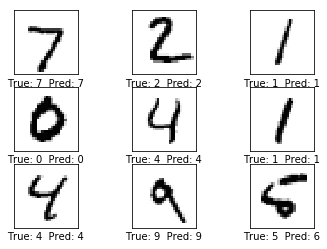

In [57]:
y_pred = np.argmax(predictions,axis=1)

# Show first nine image predictions for testing data
draw_image(x_test_flat[:9],y_test[:9],y_pred[:9])

## Draw the top five probabilities of the examples

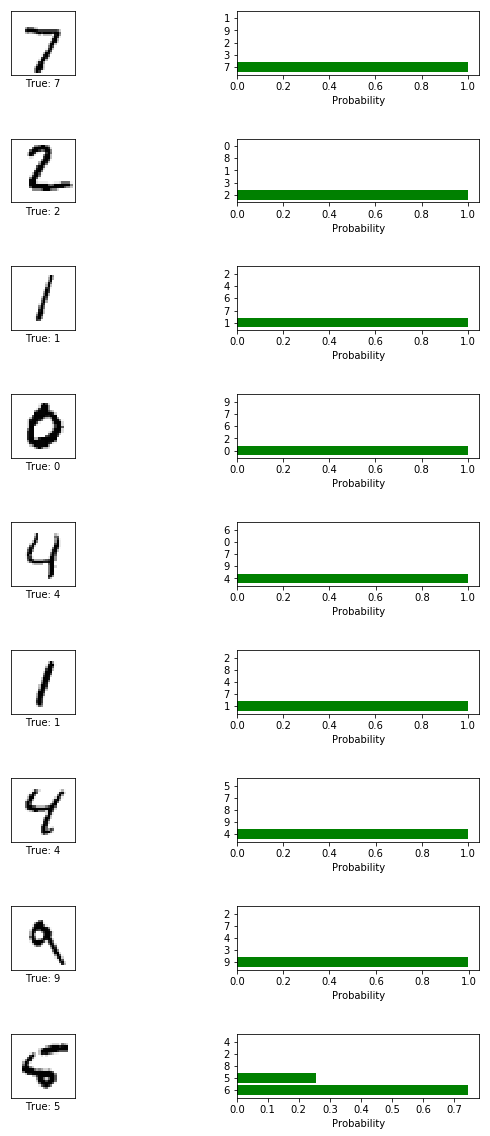

In [107]:
draw_prob(x_test_flat[:9],y_test[:9],predictions[:9])